In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pylab
import statsmodels.api as sm
from pprint import pprint as pp
%matplotlib inline

In [2]:
from scipy import stats
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, Normalizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [3]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [4]:
def avg_training_score_grading(x):
    grade = 0;
    if x < 59 :
        grade = 0
    elif x < 79:
        grade = 1
    else :
        grade = 2
    return grade    

In [5]:
def no_of_trainings_grade(x):
    grade = 0
    if x <= 5:
        grade = 0
    elif x <= 7:
        grade = 1
    else :
        grade = 2
    return grade   

In [6]:
def education_encode(x):
    x = str(x)
    x = ''.join(list(x)[0:4])
    grade = np.NaN
    if x[0:4] == 'Bach':
        grade = 1
    elif x[0:4] == 'Mast':
        grade = 2
    elif x[0:4] == 'Belo':
        grade = 0
    return grade 

In [7]:
def region_encode(x):
    return int(x[len('region_'):])

In [8]:
def age_bining(x):
    x = int(x)
    x = (x//10)
    return x
    

In [9]:
df_train['age'] = df_train['age'].apply(age_bining)
df_test['age'] = df_test['age'].apply(age_bining)

In [10]:
df_train['region'] = df_train['region'].apply(region_encode)
df_test['region'] = df_test['region'].apply(region_encode)

In [11]:
df_train['no_of_trainings'] = df_train['no_of_trainings'].apply(no_of_trainings_grade)
df_test['no_of_trainings'] = df_test['no_of_trainings'].apply(no_of_trainings_grade)

In [12]:
df_train['avg_training_score'] = df_train['avg_training_score'].apply(avg_training_score_grading)
df_test['avg_training_score'] = df_test['avg_training_score'].apply(avg_training_score_grading)

In [13]:
df_train['education'] = df_train['education'].apply(education_encode)
df_test['education'] = df_test['education'].apply(education_encode)

In [14]:
imputer = Imputer(missing_values='NaN', strategy="most_frequent", axis=0)
train_previous_year_rating = imputer.fit_transform(df_train.previous_year_rating.values.reshape(-1, 1))
df_train['previous_year_rating'] = train_previous_year_rating
test_previous_year_rating = imputer.transform(df_test.previous_year_rating.values.reshape(-1, 1))
df_test['previous_year_rating'] = test_previous_year_rating

In [15]:
df_train['education'] = df_train['education'].replace(r'', np.NaN)
df_test['education'] = df_test['education'].replace(r'', np.NaN)

In [16]:
df_train['education'] = df_train['education'].astype(object)
df_test['education'] = df_test['education'].astype(object)

In [17]:
imputer = Imputer(missing_values='NaN', strategy="most_frequent", axis=0)
train_education_filled = imputer.fit_transform(df_train.education.values.reshape(-1, 1))
df_train['education'] = train_education_filled
test_education_filled = imputer.transform(df_test.education.values.reshape(-1, 1))
df_test['education'] = test_education_filled

In [18]:
label_dict={}
for col in ['department', 'gender', 'recruitment_channel']:
    le = LabelEncoder()
    df_train[col] = le.fit_transform(df_train[col])
    df_test[col] = le.transform(df_test[col])
    label_dict[col] = (le, le.classes_)
    

In [68]:
X1 = df_train.loc[:,['department', 'region', 'gender', 'recruitment_channel', 'no_of_trainings', 'age', 
                    'length_of_service', 'KPIs_met >80%', 'awards_won?', 'avg_training_score', 
                    'previous_year_rating', 'education']].values
y1 = df_train.loc[:,['is_promoted']].values
#y_train = df_train.loc[:,['is_promoted']].values

X2 = df_test.loc[:,['department', 'region', 'gender', 'recruitment_channel', 'no_of_trainings', 'age', 
                    'length_of_service', 'KPIs_met >80%', 'awards_won?', 'avg_training_score', 
                    'previous_year_rating', 'education']].values

In [31]:
X1 = df_train.loc[:,['department', 'region', 'gender', 'recruitment_channel', 'age', 
                    'length_of_service', 'KPIs_met >80%', 'avg_training_score', 
                    'previous_year_rating', 'education']].values
y1 = df_train.loc[:,['is_promoted']].values

X2 = df_test.loc[:,['department', 'region', 'gender', 'recruitment_channel', 'age', 
                    'length_of_service', 'KPIs_met >80%', 'avg_training_score', 
                    'previous_year_rating', 'education']].values

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.05, random_state = 0)

In [64]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [65]:
print(explained_variance)

[ 0.78460365  0.13613685  0.04854249]


In [29]:
df_train.describe()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,4.972796,14.195045,1.257627,0.702379,0.868158,0.001569,3.026675,3.304481,5.865512,0.351974,0.023172,0.778864,0.085170
std,22586.581449,2.506046,10.086273,0.469717,0.457216,0.980713,0.045979,0.832047,1.214770,4.265094,0.477590,0.150450,0.773697,0.279137
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,19669.750000,4.000000,4.000000,1.000000,0.000000,0.000000,0.000000,2.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000
50%,39225.500000,5.000000,13.000000,1.000000,1.000000,0.000000,0.000000,3.000000,3.000000,5.000000,0.000000,0.000000,1.000000,0.000000
75%,58730.500000,7.000000,22.000000,2.000000,1.000000,2.000000,0.000000,3.000000,4.000000,7.000000,1.000000,0.000000,1.000000,0.000000
max,78298.000000,8.000000,34.000000,2.000000,1.000000,2.000000,2.000000,6.000000,5.000000,37.000000,1.000000,1.000000,2.000000,1.000000


2     12343
22     6428
7      4843
15     2808
13     2648
26     2260
31     1935
4      1703
27     1659
16     1465
28     1318
11     1315
23     1175
29      994
32      945
19      874
20      850
14      827
25      819
17      796
5       766
6       690
30      657
8       655
10      648
1       610
24      508
12      500
9       420
21      411
3       346
34      292
33      269
18       31
Name: region, dtype: int64


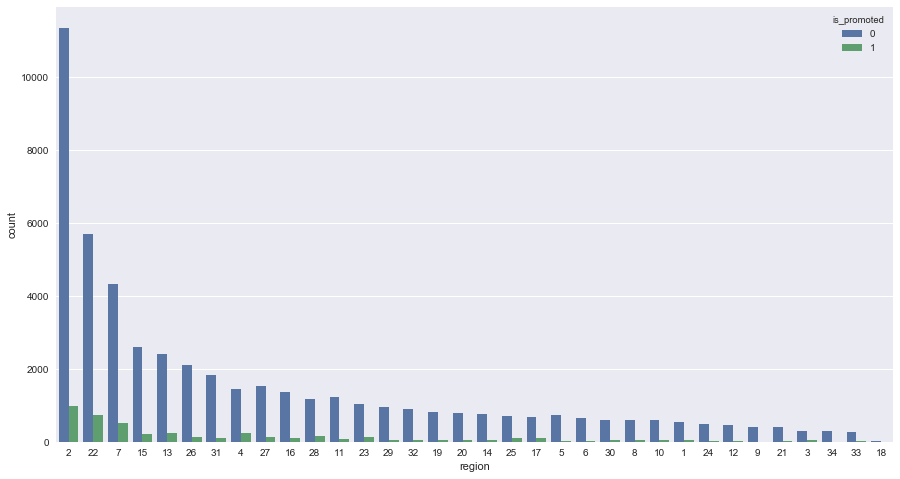

In [47]:
plt.figure(figsize=(15,8))
feature = 'region'
print(df_train[feature].value_counts())
sns.countplot(x=feature, order=df_train[feature].value_counts().index, hue="is_promoted", data=df_train)  


7    16840
4    11348
8     7138
5     7138
0     5352
1     2536
2     2418
3     1039
6      999
Name: department, dtype: int64


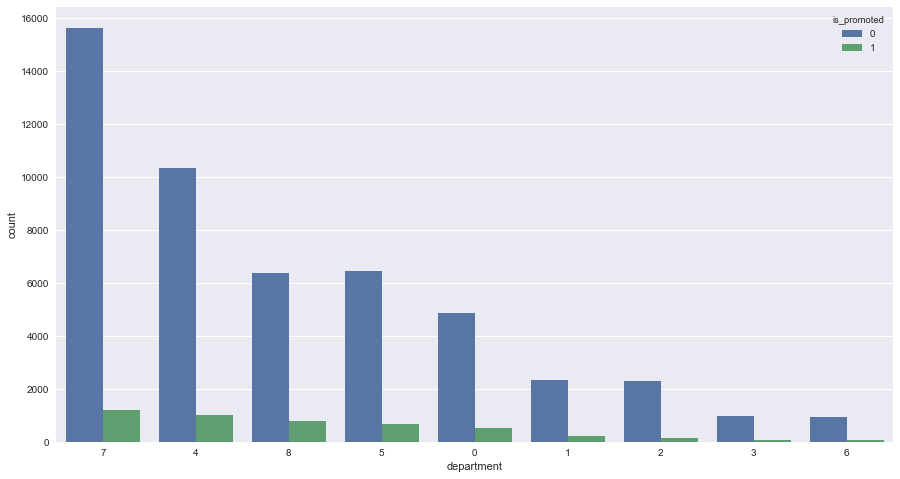

In [50]:
plt.figure(figsize=(15,8))
feature = 'department'
print(df_train[feature].value_counts())
sns.countplot(x=feature, order=df_train['department'].value_counts().index, hue="is_promoted", data=df_train)  

# Random Forest Classifier

In [76]:
rf_classifier = RandomForestClassifier(max_depth=200, n_estimators=90, criterion='entropy')
rf_classifier.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=200, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=90, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [77]:
rf_y_pred = rf_classifier.predict(X_test)
print(accuracy_score(y_test, rf_y_pred))
print(f1_score(y_test, rf_y_pred))

0.916818679314
0.380434782609


In [78]:
rf_y_pred2 = rf_classifier.predict(X2)

In [41]:
rf_y_pred2.shape

(23490,)

In [43]:
df_test.shape

(23490, 14)

In [44]:
df_test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,8724,8,26,1.0,1,2,0,20,3.0,1,1,0,1,0
1,74430,2,4,1.0,0,0,0,30,3.0,5,0,0,0,0
2,72255,7,13,1.0,1,0,0,30,1.0,4,0,0,0,0
3,38562,5,2,1.0,0,0,0,30,2.0,9,0,0,1,0
4,64486,1,29,1.0,1,2,0,30,4.0,7,0,0,1,0


In [49]:
df_train.head(20)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,7,7,2.0,0,2,0,30,5.0,8,1,0,0,0
1,65141,4,22,1.0,1,0,0,30,5.0,4,0,0,1,0
2,7513,7,19,1.0,1,2,0,30,3.0,7,0,0,0,0
3,2542,7,23,1.0,1,0,0,30,1.0,10,0,0,0,0
4,48945,8,26,1.0,1,0,0,40,3.0,2,0,0,1,0
5,58896,0,2,1.0,1,2,0,30,3.0,7,0,0,2,0
6,20379,4,20,1.0,0,0,0,30,3.0,5,0,0,1,0
7,16290,4,34,2.0,1,2,0,30,3.0,6,0,0,1,0
8,73202,0,20,1.0,1,0,0,20,4.0,5,0,0,2,0
9,28911,7,1,2.0,1,2,0,30,5.0,5,1,0,0,0


In [79]:
df_test['is_promoted'] = rf_y_pred2

In [80]:
header = ['employee_id', 'is_promoted']
df_test[header].to_csv('sample_submission.csv', columns = header, index=False)